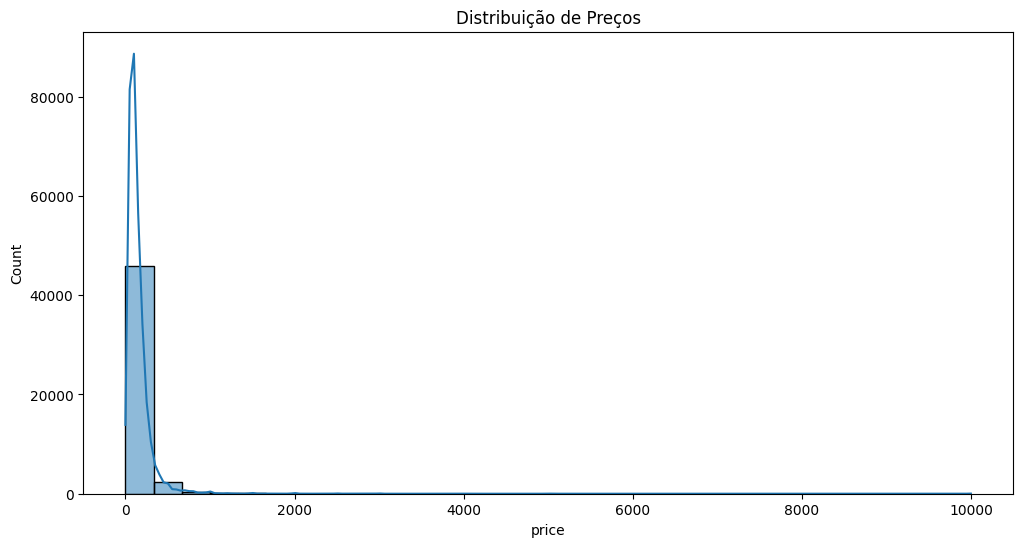

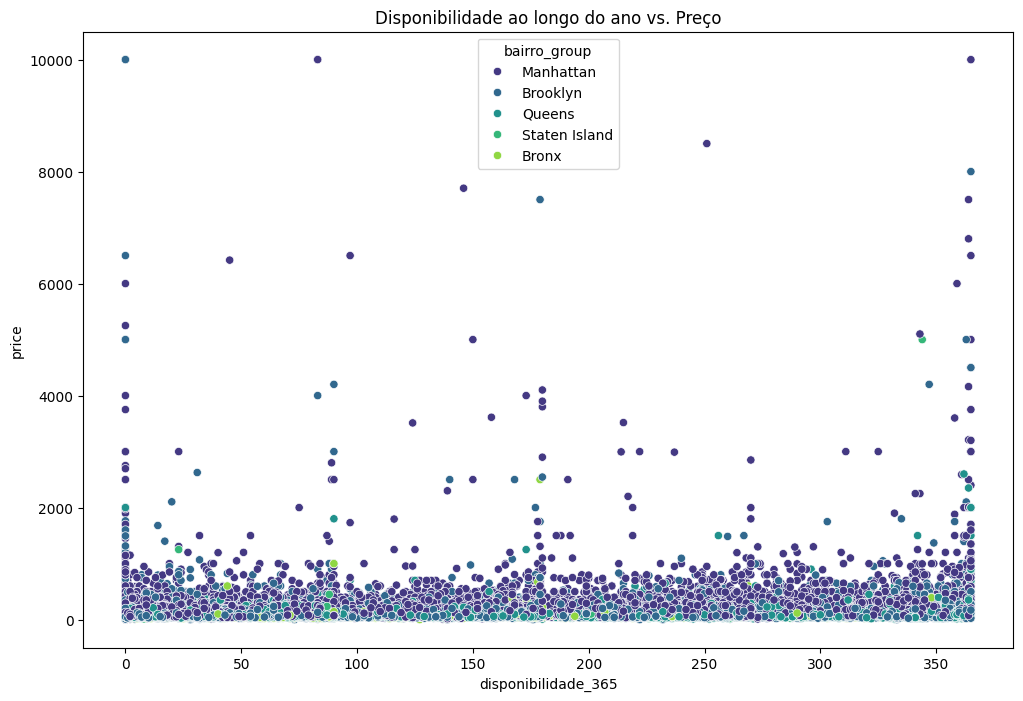

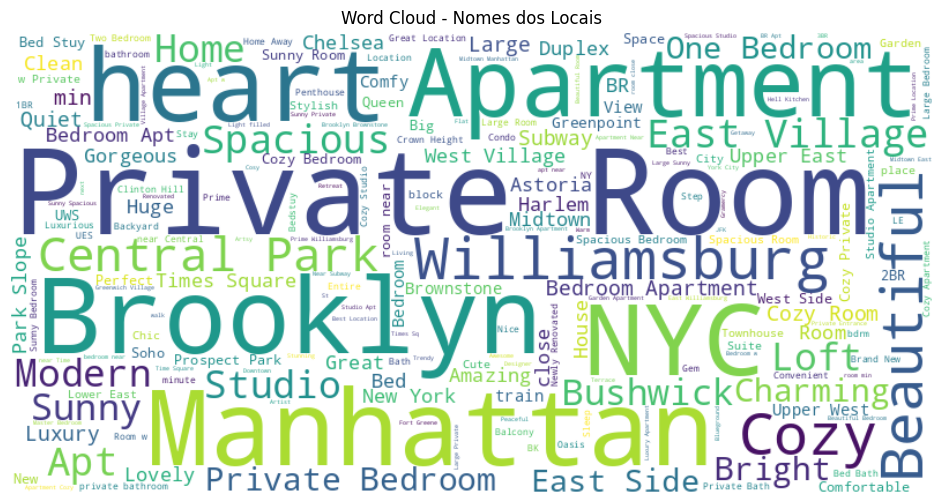

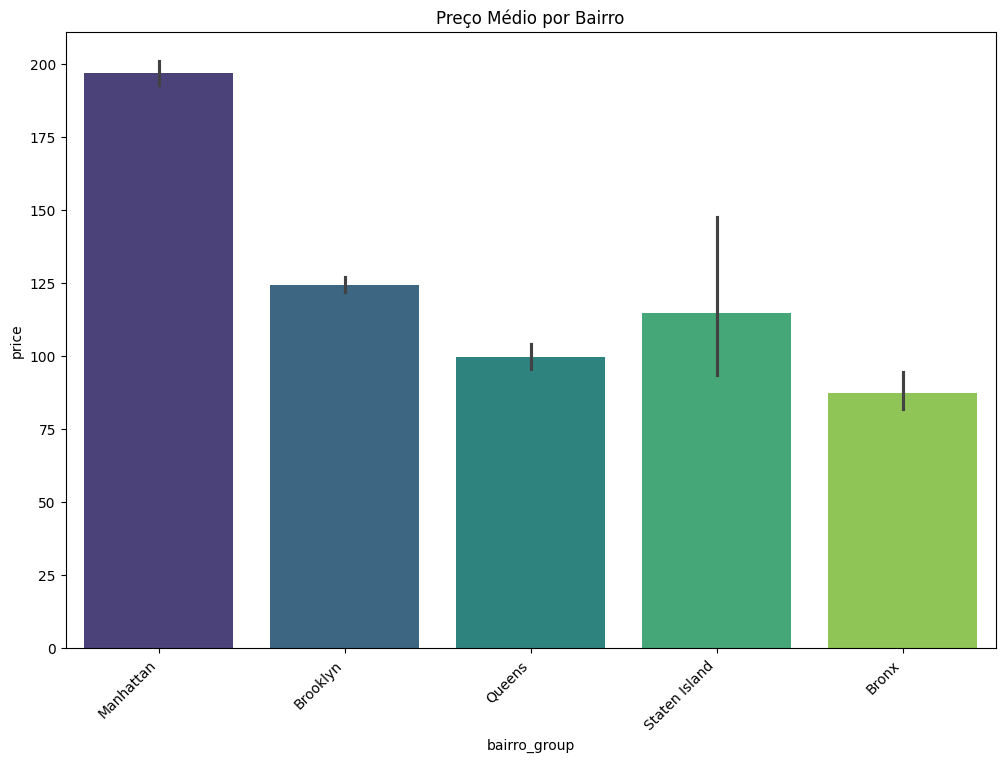

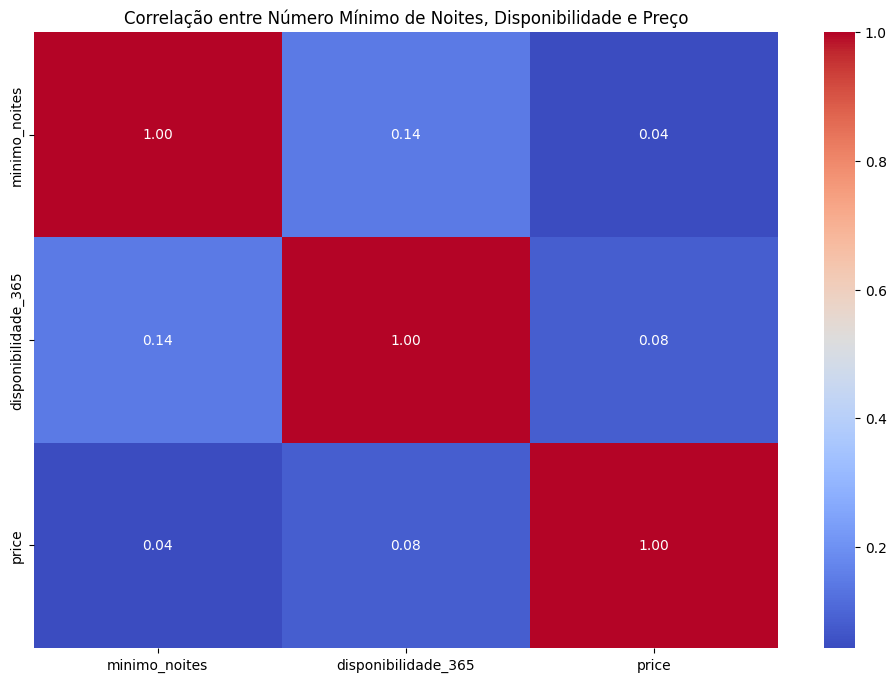

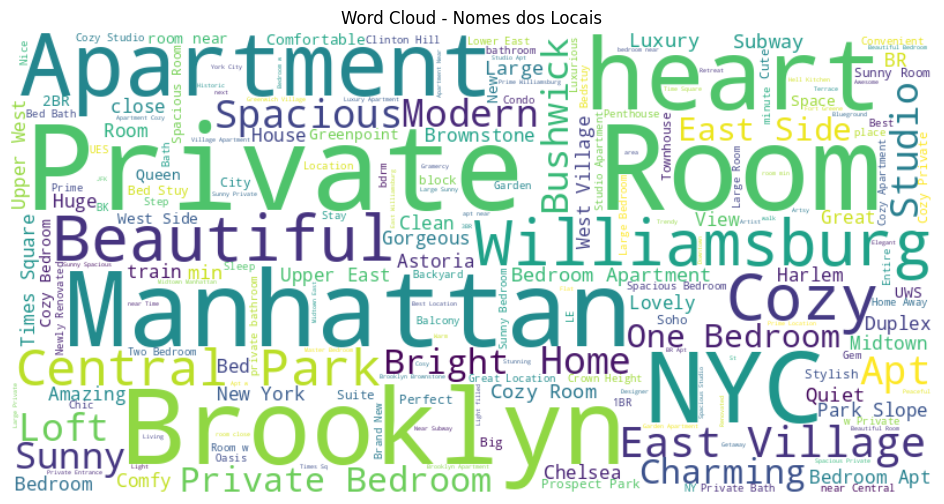

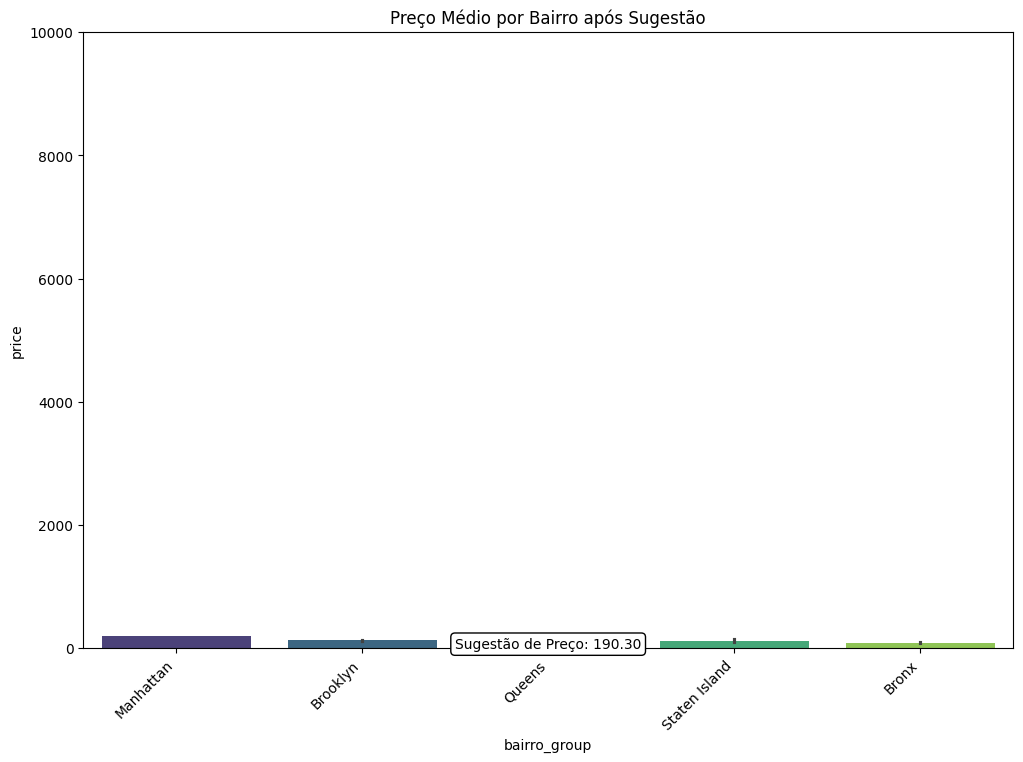

In [97]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



# Carregar o arquivo CSV
df = pd.read_csv("Desafio Ciência de Dados - Precificação 2024-4.csv")

# 1. Análise Exploratória de Dados (EDA)

# Exploração da distribuição de preços
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuição de Preços')
plt.show()

# Relação entre variáveis
plt.figure(figsize=(12, 8))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, hue='bairro_group', palette='viridis')
plt.title('Disponibilidade ao longo do ano vs. Preço')
plt.show()

# Padrão no texto do nome do local
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['nome'].astype(str)))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Nomes dos Locais')
plt.axis('off')
plt.show()

# 2. Respostas às Perguntas:

# a. Localização para Investir
plt.figure(figsize=(12, 8))
sns.barplot(x='bairro_group', y='price', data=df, palette='viridis', hue='bairro_group', legend=False)
plt.title('Preço Médio por Bairro')
plt.xticks(rotation=45, ha='right')
plt.show()

# b. Impacto de Noites Mínimas e Disponibilidade
correlation_nights_availability_price = df[['minimo_noites', 'disponibilidade_365', 'price']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_nights_availability_price, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Número Mínimo de Noites, Disponibilidade e Preço')
plt.show()

# Padrão no texto do nome do local
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['nome'].astype(str).dropna()))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Nomes dos Locais')
plt.axis('off')
plt.show()

# 3. Previsão de Preço:

# Treinamento do modelo
le_bairro = LabelEncoder()
df['bairro_group_encoded'] = le_bairro.fit_transform(df['bairro_group'])

X_train, X_test, y_train, y_test = train_test_split(
    df[['bairro_group_encoded', 'minimo_noites', 'disponibilidade_365']],
    df['price'],
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Sugestão de Preço:

#  apartamento com as características fornecidas
apartment_data = {
    'bairro_group': 'Manhattan',
    'minimo_noites': 1,
    'disponibilidade_365': 355
}

# Criar um DataFrame para o novo apartamento
apartment_df = pd.DataFrame(apartment_data, index=[0])

# Codificar variáveis categóricas para o novo apartamento
apartment_df['bairro_group_encoded'] = le_bairro.transform(apartment_df['bairro_group'])

# Escalar os dados
apartment_scaled = scaler.transform(apartment_df[['bairro_group_encoded', 'minimo_noites', 'disponibilidade_365']])

# Prever o preço para o novo apartamento
predicted_price = model.predict(apartment_scaled)

# Visualização dos preços médios por bairro após a sugestão de preço
plt.figure(figsize=(12, 8))
sns.barplot(x='bairro_group', y='price', data=df, palette='viridis', hue='bairro_group', legend=False)
plt.title('Preço Médio por Bairro após Sugestão')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df['price'].max())

# Anotação para a sugestão de preço
plt.annotate(
    f'Sugestão de Preço: {predicted_price[0]:.2f}',
    xy=(0.5, 0), xycoords='axes fraction', ha='center',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"),
    fontsize=10, color='black'
)

plt.show()








In [102]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
